# bank_interest_rate

In [ ]:
When we study the features, write the small information about that feature
so, we can understand which column is important to predict interest rate. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_data_train.csv')
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [3]:
df.isna().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

In [4]:
df['ID'].nunique() # drop id colum as it have all unique values

2199

In [5]:
df.drop('ID',axis=1,inplace=True)

<AxesSubplot:>

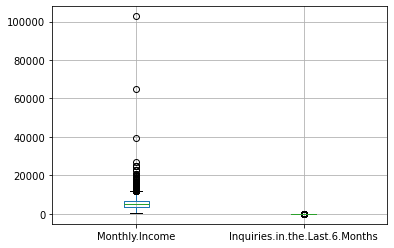

In [6]:
df.boxplot()

In [7]:
str(df.columns).replace(".",'_')

"Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',\n       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',\n       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',\n       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',\n       'Employment_Length'],\n      dtype='object')"

In [8]:
df.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [9]:
df.rename(columns={'Amount.Requested':'Amount_Requested', 
                   'Amount.Funded.By.Investors':'Amount_Funded_By_Investors', 
                   'Interest.Rate':'Interest_Rate',
       'Loan.Length':'Loan_Length', 'Loan.Purpose':'Loan_Purpose', 
                   'Debt.To.Income.Ratio':'Debt_To_Income_Ratio',
                   'State':'State','Home.Ownership':'Home_Ownership',
                   'Monthly.Income':'Monthly_Income',
                   'FICO.Range':'FICO_Range', 
                   'Open.CREDIT.Lines':'Open_CREDIT_Lines',
                   'Revolving.CREDIT.Balance':'Revolving_CREDIT_Balance',
                   'Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months',
                   'Employment.Length':'Employment_Length'},inplace=True)

In [10]:
df.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

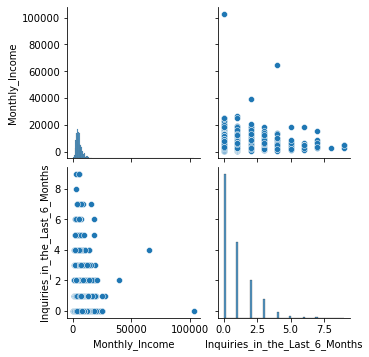

In [11]:
sns.pairplot(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2199 non-null   object 
 1   Amount_Funded_By_Investors      2199 non-null   object 
 2   Interest_Rate                   2200 non-null   object 
 3   Loan_Length                     2199 non-null   object 
 4   Loan_Purpose                    2199 non-null   object 
 5   Debt_To_Income_Ratio            2199 non-null   object 
 6   State                           2199 non-null   object 
 7   Home_Ownership                  2199 non-null   object 
 8   Monthly_Income                  2197 non-null   float64
 9   FICO_Range                      2200 non-null   object 
 10  Open_CREDIT_Lines               2196 non-null   object 
 11  Revolving_CREDIT_Balance        2197 non-null   object 
 12  Inquiries_in_the_Last_6_Months  21

In [13]:
df.describe()

,Monthly_Income,Inquiries_in_the_Last_6_Months
count,2197.000000,2197.000000
mean,5727.459290,0.898498
std,4073.529708,1.219223
min,588.500000,0.000000
25%,3458.000000,0.000000
50%,5000.000000,0.000000
75%,6883.330000,1.000000
max,102750.000000,9.000000


### Amount_Requested

In [14]:
df['Amount_Requested'].value_counts()

10000    178
12000    132
5000      96
20000     92
6000      89
        ... 
9525       1
1950       1
15300      1
11950      1
13225      1
Name: Amount_Requested, Length: 356, dtype: int64

In [15]:
df['Amount_Requested'].unique()

array(['25000', '19750', '2100', '28000', '24250', '5400', '16000',
       '6400', '24000', '8000', '9000', '13000', '10000', '3600', '7350',
       '17000', '18825', '4200', '5000', '3700', '6625', '15000', '29175',
       '6000', '22000', '18000', '12000', '6500', '4000', '7300', '19400',
       '11625', '3000', '19000', '2500', '17350', '21000', '20000',
       '1900', '23300', '8400', '1600', '7200', '15400', '7000', '20500',
       '24375', '5875', '14000', '5500', '4800', '34500', '20950', '7500',
       '14400', '14675', '24500', '35000', '11200', '30000', '3200',
       '11700', '11500', '8500', '16500', '16550', '13250', '5200',
       '2000', '4500', '20800', '8325', '6600', '7750', '19500', '27050',
       '8800', '11000', '3500', '21200', '2650', '8575', '13200', '10750',
       '5450', '2400', '15300', '17325', '19125', '19075', '5600',
       '10400', '16450', '11325', '10050', '14725', '16750', '4325',
       '10075', '10800', '23500', '6200', '2875', '27825', '12250',
 

In [16]:
df['Amount_Requested'].isna().sum()

1

In [17]:
df['Amount_Requested'].loc[df['Amount_Requested']=='.']

371     .
1357    .
1791    .
1991    .
Name: Amount_Requested, dtype: object

In [18]:
df.replace('.',np.nan,inplace=True)

In [19]:
df['Amount_Requested'].isna() .sum()

5

In [20]:
df['Amount_Requested']=df['Amount_Requested'].astype('float')

In [21]:
df['Amount_Requested'].dtype

dtype('float64')

In [22]:
df['Amount_Requested'].mean()

12496.469248291573

In [23]:
df['Amount_Requested'].mode()[0]

10000.0

In [24]:
df['Amount_Requested'].median()

10000.0

In [25]:
df['Amount_Requested'].fillna(df['Amount_Requested'].median(),inplace=True)

<AxesSubplot:xlabel='Amount_Requested'>

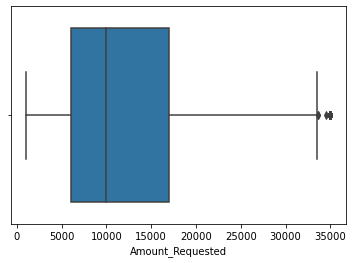

In [26]:
sns.boxplot(df['Amount_Requested'])

In [27]:
iqr=df['Amount_Requested'].quantile(0.75)-df['Amount_Requested'].quantile(0.25)
upper_limit=df['Amount_Requested'].quantile(0.75)+2*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 11000.0
upper limit 39000.0


In [28]:
df['Amount_Requested'].loc[df['Amount_Requested']>upper_limit]

Series([], Name: Amount_Requested, dtype: float64)

In [29]:
# df.info()

### Amount_Funded_By_Investors

In [30]:
df['Amount_Funded_By_Investors'].dtype

dtype('O')

In [31]:
df['Amount_Funded_By_Investors'].isna().sum()

4

In [32]:
df['Amount_Funded_By_Investors']=df['Amount_Funded_By_Investors'].astype('float')

In [33]:
df['Amount_Funded_By_Investors'].mean()

12077.803406193085

In [34]:
df['Amount_Funded_By_Investors'].mode()

0    10000.0
Name: Amount_Funded_By_Investors, dtype: float64

In [35]:
df['Amount_Funded_By_Investors'].median()

10000.0

In [36]:
df['Amount_Funded_By_Investors'].fillna(df['Amount_Funded_By_Investors'].median(),inplace=True)

<AxesSubplot:xlabel='Amount_Funded_By_Investors'>

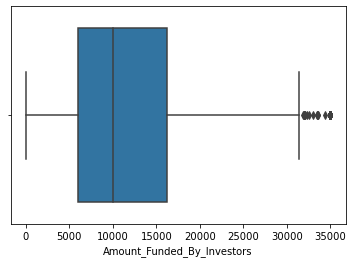

In [37]:
sns.boxplot(df['Amount_Funded_By_Investors'])

In [38]:
iqr=df['Amount_Funded_By_Investors'].quantile(0.75)-df['Amount_Funded_By_Investors'].quantile(0.25)
upper_limit=df['Amount_Funded_By_Investors'].quantile(0.75)+3*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 10200.0
upper limit 46800.0


In [39]:
df['Amount_Funded_By_Investors'].loc[df['Amount_Funded_By_Investors']>upper_limit]

Series([], Name: Amount_Funded_By_Investors, dtype: float64)

In [40]:
# Interest_Rate >>>>>> target column

In [41]:
df['Interest_Rate'].dtype

dtype('O')

In [42]:
df['Interest_Rate']

0       18.49%
1       17.27%
2       14.33%
3       16.29%
4       12.23%
         ...  
2195    23.28%
2196    14.33%
2197    15.31%
2198    20.99%
2199    10.16%
Name: Interest_Rate, Length: 2200, dtype: object

In [43]:
df['Interest_Rate']=df["Interest_Rate"].str.replace("%","")

In [44]:
df['Interest_Rate']=df['Interest_Rate'].astype('float') 

In [45]:
df['Interest_Rate'].isna().sum()

0

In [46]:
# df.info()

### Loan_Length

In [47]:
df['Loan_Length'].value_counts().to_dict()

{'36 months': 1722, '60 months': 476}

In [48]:
df['Loan_Length'].replace({'36 months': 36, '60 months': 60},inplace=True)

<AxesSubplot:xlabel='Loan_Length', ylabel='count'>

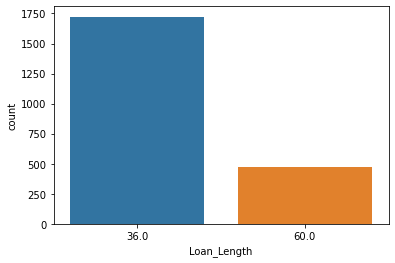

In [49]:
sns.countplot(df['Loan_Length'])

### Loan_Purpose

In [50]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1147
credit_card            394
other                  174
home_improvement       135
major_purchase          84
small_business          80
car                     45
wedding                 35
medical                 26
moving                  25
house                   19
vacation                18
educational             14
renewable_energy         3
Name: Loan_Purpose, dtype: int64

In [51]:
df_Loan_Purpose=pd.get_dummies(df['Loan_Purpose'])
df.drop('Loan_Purpose',axis=1,inplace=True)
df_Loan_Purpose

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2196,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2197,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2198,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# df.info()

### Debt_To_Income_Ratio

In [53]:
df['Debt_To_Income_Ratio'].nunique()

1526

In [54]:
df['Debt_To_Income_Ratio'].dtype

dtype('O')

In [55]:
df['Debt_To_Income_Ratio']=df["Debt_To_Income_Ratio"].str.replace("%","")

In [56]:
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].astype('float')

In [57]:
df['Debt_To_Income_Ratio'].dtype

dtype('float64')

<AxesSubplot:xlabel='Debt_To_Income_Ratio'>

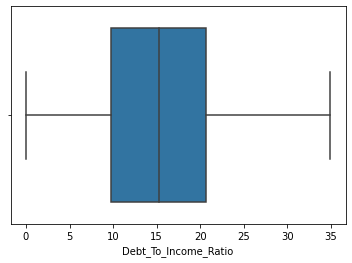

In [58]:
sns.boxplot(df['Debt_To_Income_Ratio'])

In [59]:
df=pd.concat([df,df_Loan_Purpose],axis=1)
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,25000.0,25000.00,18.49,60.0,27.56,VA,MORTGAGE,8606.56,720-724,11,...,0,0,0,0,0,0,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,NY,MORTGAGE,6737.50,710-714,14,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,LA,OWN,1000.00,690-694,13,...,0,0,1,0,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,NV,MORTGAGE,7083.33,710-714,12,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,OH,MORTGAGE,5833.33,730-734,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,IL,MORTGAGE,7083.33,675-679,16,...,0,0,0,0,0,1,0,0,0,0
2196,4200.0,4200.00,14.33,60.0,14.16,NJ,RENT,3850.00,700-704,4,...,0,0,0,0,0,0,0,0,0,0
2197,19800.0,19775.00,15.31,60.0,15.03,IL,MORTGAGE,6666.67,675-679,10,...,0,0,0,0,0,0,0,0,0,0
2198,18000.0,18000.00,20.99,60.0,11.63,CA,RENT,9051.83,670-674,5,...,0,0,0,0,0,0,0,0,0,0


# State

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2200 non-null   float64
 1   Amount_Funded_By_Investors      2200 non-null   float64
 2   Interest_Rate                   2200 non-null   float64
 3   Loan_Length                     2198 non-null   float64
 4   Debt_To_Income_Ratio            2199 non-null   float64
 5   State                           2198 non-null   object 
 6   Home_Ownership                  2199 non-null   object 
 7   Monthly_Income                  2197 non-null   float64
 8   FICO_Range                      2200 non-null   object 
 9   Open_CREDIT_Lines               2193 non-null   object 
 10  Revolving_CREDIT_Balance        2195 non-null   object 
 11  Inquiries_in_the_Last_6_Months  2197 non-null   float64
 12  Employment_Length               21

In [61]:
df['State'].value_counts()

CA    376
NY    231
FL    149
TX    146
PA     88
IL     87
GA     82
NJ     81
VA     70
MA     64
MD     59
NC     59
OH     59
CO     54
WA     52
CT     44
AZ     44
MI     38
AL     34
MN     30
NV     29
MO     29
SC     27
OR     25
WI     25
KS     21
OK     20
LA     20
KY     20
NH     14
UT     13
RI     13
HI     12
WV     12
NM     12
AR     11
DC      9
AK      8
DE      7
MT      7
VT      5
WY      4
SD      4
IN      3
MS      1
Name: State, dtype: int64

# Home_Ownership

In [62]:
df['Home_Ownership'].value_counts()

MORTGAGE    1018
RENT         999
OWN          177
OTHER          4
NONE           1
Name: Home_Ownership, dtype: int64

In [63]:
Home_Ownership_onehot = pd.get_dummies(df['Home_Ownership'],drop_first=True)

In [64]:
Home_Ownership_onehot.shape

(2200, 4)

# Monthly_Income

In [65]:
df['Monthly_Income']

0       8606.56
1       6737.50
2       1000.00
3       7083.33
4       5833.33
         ...   
2195    7083.33
2196    3850.00
2197    6666.67
2198    9051.83
2199    8333.33
Name: Monthly_Income, Length: 2200, dtype: float64

In [66]:
df['Monthly_Income'].describe()

count      2197.000000
mean       5727.459290
std        4073.529708
min         588.500000
25%        3458.000000
50%        5000.000000
75%        6883.330000
max      102750.000000
Name: Monthly_Income, dtype: float64

<AxesSubplot:xlabel='Monthly_Income'>

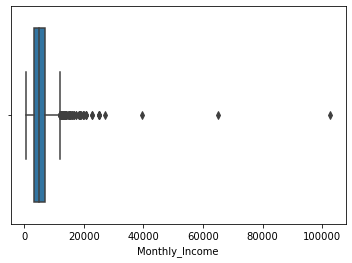

In [67]:
sns.boxplot(x=df['Monthly_Income'])

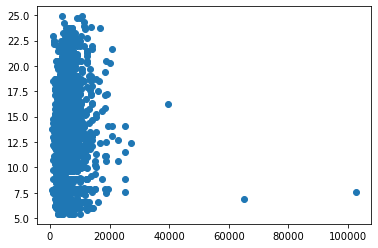

In [68]:
plt.scatter(df['Monthly_Income'],df['Interest_Rate'])

<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

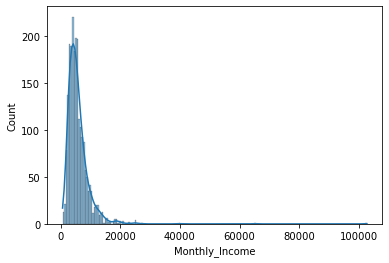

In [69]:
sns.histplot(df['Monthly_Income'],kde=True)

# FICO_Range

In [70]:
df['FICO_Range']

0       720-724
1       710-714
2       690-694
3       710-714
4       730-734
         ...   
2195    675-679
2196    700-704
2197    675-679
2198    670-674
2199    710-714
Name: FICO_Range, Length: 2200, dtype: object

In [77]:
def ranges(x):
    sp=x.split('-')
    return sp[1]

In [75]:
df['FICO_Range_from'] = df['FICO_Range'].apply(ranges)
# df['FICO_Range_to'] = df['FICO_Range'].apply(ranges)

In [76]:
df['FICO_Range_from']=df['FICO_Range_from'].astype(int)

In [78]:
df['FICO_Range_to']=df['FICO_Range_to'].astype(int)

In [79]:
df['FICO_Range_from']

0       720
1       710
2       690
3       710
4       730
       ... 
2195    675
2196    700
2197    675
2198    670
2199    710
Name: FICO_Range_from, Length: 2200, dtype: int32

In [80]:
df['FICO_Range_to']

0       724
1       714
2       694
3       714
4       734
       ... 
2195    679
2196    704
2197    679
2198    674
2199    714
Name: FICO_Range_to, Length: 2200, dtype: int32

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2200 non-null   float64
 1   Amount_Funded_By_Investors      2200 non-null   float64
 2   Interest_Rate                   2200 non-null   float64
 3   Loan_Length                     2198 non-null   float64
 4   Debt_To_Income_Ratio            2199 non-null   float64
 5   State                           2198 non-null   object 
 6   Home_Ownership                  2199 non-null   object 
 7   Monthly_Income                  2197 non-null   float64
 8   FICO_Range                      2200 non-null   object 
 9   Open_CREDIT_Lines               2193 non-null   object 
 10  Revolving_CREDIT_Balance        2195 non-null   object 
 11  Inquiries_in_the_Last_6_Months  2197 non-null   float64
 12  Employment_Length               21

# Open_CREDIT_Lines

In [ ]:
2) what is revolving credit balance?

Revolving credit can come to the rescue.
Revolving credit is a credit account that lets you repeatedly borrow money up to a set limit and pay it back over time.

In [ ]:
Here FICO rang - credit line - revolving credit balance are important to predict interest rate

In [82]:
df['Open_CREDIT_Lines']

0       11
1       14
2       13
3       12
4        6
        ..
2195    16
2196     4
2197    10
2198     5
2199    10
Name: Open_CREDIT_Lines, Length: 2200, dtype: object

In [95]:
df['Open_CREDIT_Lines'].describe()

count    2200.000000
mean       10.078182
std         4.491240
min         2.000000
25%         7.000000
50%         9.000000
75%        13.000000
max        38.000000
Name: Open_CREDIT_Lines, dtype: float64

In [83]:
df['Open_CREDIT_Lines'].isna().sum()

7

In [84]:
median = df['Open_CREDIT_Lines'].median()

In [85]:
df['Open_CREDIT_Lines'].fillna(median,axis=0,inplace=True)

In [86]:
df['Open_CREDIT_Lines'].isna().sum()

0

In [87]:
df['Open_CREDIT_Lines']=df['Open_CREDIT_Lines'].astype(int)

<AxesSubplot:xlabel='Open_CREDIT_Lines'>

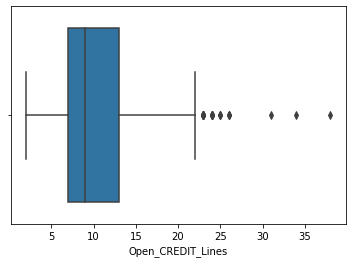

In [88]:
sns.boxplot(x=df['Open_CREDIT_Lines'])

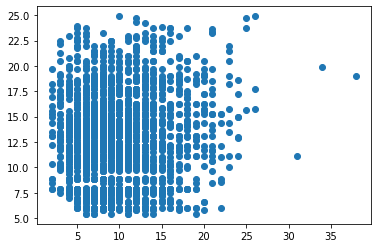

In [93]:
plt.scatter(df['Open_CREDIT_Lines'],df['Interest_Rate'])

<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

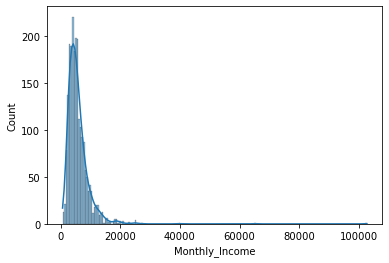

In [94]:
sns.histplot(df['Monthly_Income'],kde=True)

In [89]:
df[df['Open_CREDIT_Lines']>35]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,FICO_Range_to,FICO_Range_from
2117,35000.0,35000.0,19.05,36.0,21.12,CT,MORTGAGE,13750.0,735-739,38,...,0,0,0,0,0,0,0,0,739,735


In [90]:
df[df['Open_CREDIT_Lines']>30]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,FICO_Range_to,FICO_Range_from
1244,21000.0,6165.31,11.09,36.0,21.28,CA,OWN,18333.33,745-749,31,...,0,0,0,0,0,0,0,0,749,745
1660,10000.0,10000.00,19.91,36.0,23.35,CO,MORTGAGE,6000.00,680-684,34,...,0,0,0,0,0,0,0,0,684,680
2117,35000.0,35000.00,19.05,36.0,21.12,CT,MORTGAGE,13750.00,735-739,38,...,0,0,0,0,0,0,0,0,739,735


In [91]:
df.drop('FICO_Range',axis=1,inplace=True)

In [92]:
df=pd.concat([df,Home_Ownership_onehot],axis=1)
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,...,renewable_energy,small_business,vacation,wedding,FICO_Range_to,FICO_Range_from,NONE,OTHER,OWN,RENT
0,25000.0,25000.00,18.49,60.0,27.56,VA,MORTGAGE,8606.56,11,15210,...,0,0,0,0,724,720,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,NY,MORTGAGE,6737.50,14,19070,...,0,0,0,0,714,710,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,LA,OWN,1000.00,13,893,...,0,0,0,0,694,690,0,0,1,0
3,28000.0,28000.00,16.29,36.0,19.62,NV,MORTGAGE,7083.33,12,38194,...,0,0,0,0,714,710,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,OH,MORTGAGE,5833.33,6,31061,...,0,0,0,0,734,730,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,IL,MORTGAGE,7083.33,16,17969,...,0,0,0,0,679,675,0,0,0,0
2196,4200.0,4200.00,14.33,60.0,14.16,NJ,RENT,3850.00,4,5718,...,0,0,0,0,704,700,0,0,0,1
2197,19800.0,19775.00,15.31,60.0,15.03,IL,MORTGAGE,6666.67,10,46879,...,0,0,0,0,679,675,0,0,0,0
2198,18000.0,18000.00,20.99,60.0,11.63,CA,RENT,9051.83,5,32394,...,0,0,0,0,674,670,0,0,0,1


# Revolving.CREDIT.Balance

In [96]:
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,...,renewable_energy,small_business,vacation,wedding,FICO_Range_to,FICO_Range_from,NONE,OTHER,OWN,RENT
0,25000.0,25000.00,18.49,60.0,27.56,VA,MORTGAGE,8606.56,11,15210,...,0,0,0,0,724,720,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,NY,MORTGAGE,6737.50,14,19070,...,0,0,0,0,714,710,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,LA,OWN,1000.00,13,893,...,0,0,0,0,694,690,0,0,1,0
3,28000.0,28000.00,16.29,36.0,19.62,NV,MORTGAGE,7083.33,12,38194,...,0,0,0,0,714,710,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,OH,MORTGAGE,5833.33,6,31061,...,0,0,0,0,734,730,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,IL,MORTGAGE,7083.33,16,17969,...,0,0,0,0,679,675,0,0,0,0
2196,4200.0,4200.00,14.33,60.0,14.16,NJ,RENT,3850.00,4,5718,...,0,0,0,0,704,700,0,0,0,1
2197,19800.0,19775.00,15.31,60.0,15.03,IL,MORTGAGE,6666.67,10,46879,...,0,0,0,0,679,675,0,0,0,0
2198,18000.0,18000.00,20.99,60.0,11.63,CA,RENT,9051.83,5,32394,...,0,0,0,0,674,670,0,0,0,1
